In [139]:

from arin_privacy_publication.mse_distance import MseDistance
from arin_privacy_publication.min_distance import MinDistance
from arin_privacy_publication.laplace_noise import LaplaceNoise
from arin_privacy_publication.max_statistic import MaxStatistic

from arin_privacy_publication.mean_statistic import MeanStatistic, SafeMeanStatistic
from arin_privacy_publication.multy_statistic import MultyStatistic
from arin_privacy_publication.variance_statistic import VarianceStatistic, SafeVarianceStatistic
from arin_privacy_publication.tools_privacy import compute_privacy_dmr
from scipy.stats import norm # type: ignore
import matplotlib.pyplot as plt

import numpy as np
from scipy import stats
from statsmodels.stats.power import TTestIndPower

In [140]:
from arin_privacy_publication.max_statistic import SafeMaxStatistic
import numpy as np

k = 10000
f = MinDistance()
d = []
list_r = [0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
list_epsilon = [0.002, 0.004, 0.008, 0.016, 0.032, 0.064, 0.128, 0.256, 0.512, 1.024]
lengths = [50, 100, 200]
for length in lengths:
    d.append(norm.rvs(loc=0.0, scale=1.0, size=length))

## DP STUFF
list_means = []
list_eps_means = []

# mean
for data in d:
    list_means.append([])
    list_eps_means.append([])
    counter = 0
    for r in list_r:
        list_means[-1].append(compute_privacy_dmr(k, data, r, f, MeanStatistic()))
        counter += 1
    for eps in list_epsilon:
            list_eps_means[-1].append([])
            for r in list_r:
                list_eps_means[-1][-1].append(compute_privacy_dmr(k, data, r, f, SafeMeanStatistic(epsilon=eps)))


#variace
list_variance = []
list_eps_variance = []

for data in d:
    list_variance.append([])
    list_eps_variance.append([])
    counter = 0
    for r in list_r:
        list_variance[-1].append(compute_privacy_dmr(k, data, r, f, VarianceStatistic()))
        counter += 1
    for eps in list_epsilon:
            list_eps_variance[-1].append([])
            for r in list_r:
                list_eps_variance[-1][-1].append(compute_privacy_dmr(k, data, r, f, SafeVarianceStatistic(epsilon=eps)))

#max
list_max = []
list_eps_max = []

for data in d:
    list_max.append([])
    list_eps_max.append([])
    counter = 0
    for r in list_r:
        list_max[-1].append(compute_privacy_dmr(k, data, r, f, MaxStatistic()))
        counter += 1
    for eps in list_epsilon:
            list_eps_max[-1].append([])
            for r in list_r:
                list_eps_max[-1][-1].append(compute_privacy_dmr(k, data, r, f, SafeMaxStatistic(epsilon=eps)))

# Define the x and y values for the curve
x = np.array(list_r)
# baseline = 0.5

def auc(x, estimator_results):
    areas = []
    for length in estimator_results:
        areas.append([])
        for ratio in length:
            y = np.array(ratio)
            areas[-1].append(np.trapz(y, x))
    return areas

#Mean
areas_mean = auc(x, list_eps_means)

#Variance
areas_variance = auc(x, list_eps_variance)

#Max
areas_max = auc(x, list_eps_max)



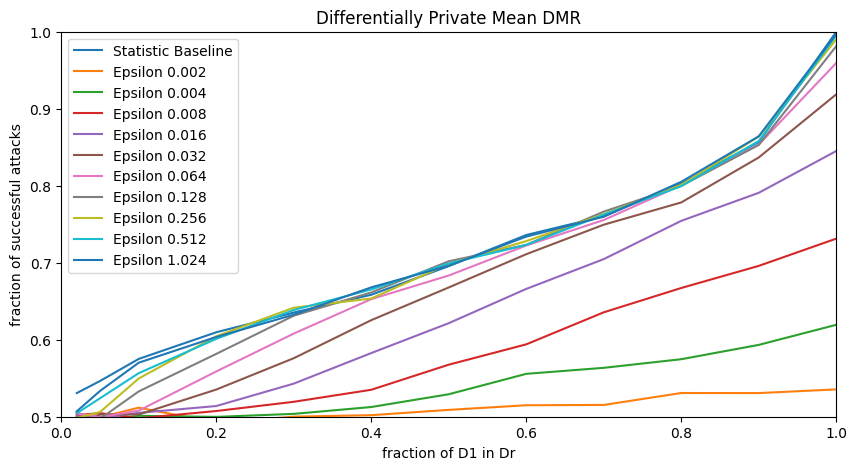

In [141]:
plt.figure(figsize=(10, 5))

plt.plot(list_r, list_means[2], label='Statistic Baseline')

for ratio, eps in zip(list_eps_means[2], list_epsilon):
    plt.plot(list_r, ratio, label='Epsilon '+str(eps))


plt.xlabel('fraction of D1 in Dr')
plt.ylabel('fraction of successful attacks')
plt.title('Differentially Private Mean DMR')
plt.xlim(0.0, 1.0)
plt.ylim(0.5, 1.0)
plt.legend()
plt.show()

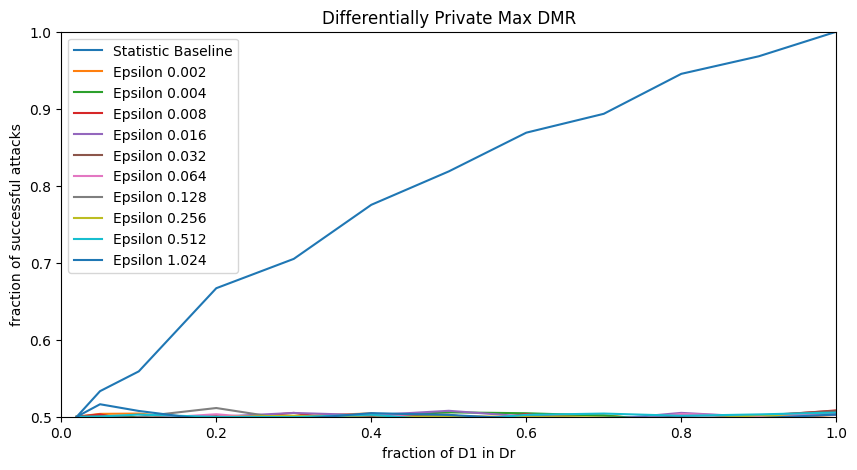

In [142]:
plt.figure(figsize=(10, 5))

plt.plot(list_r, list_max[0], label='Statistic Baseline')

for ratio, eps in zip(list_eps_max[0], list_epsilon):
    plt.plot(list_r, ratio, label='Epsilon '+str(eps))


plt.xlabel('fraction of D1 in Dr')
plt.ylabel('fraction of successful attacks')
plt.title('Differentially Private Max DMR')
plt.xlim(0.0, 1.0)
plt.ylim(0.5, 1.0)
plt.legend()
plt.show()

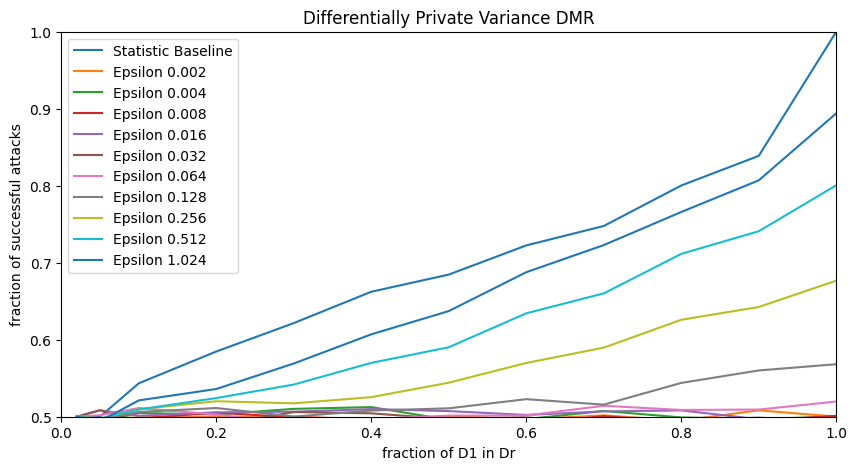

In [143]:
plt.figure(figsize=(10, 5))

plt.plot(list_r, list_variance[0], label='Statistic Baseline')

for ratio, eps in zip(list_eps_variance[0], list_epsilon):
    plt.plot(list_r, ratio, label='Epsilon '+str(eps))


plt.xlabel('fraction of D1 in Dr')
plt.ylabel('fraction of successful attacks')
plt.title('Differentially Private Variance DMR')
plt.xlim(0.0, 1.0)
plt.ylim(0.5, 1.0)
plt.legend()
plt.show()

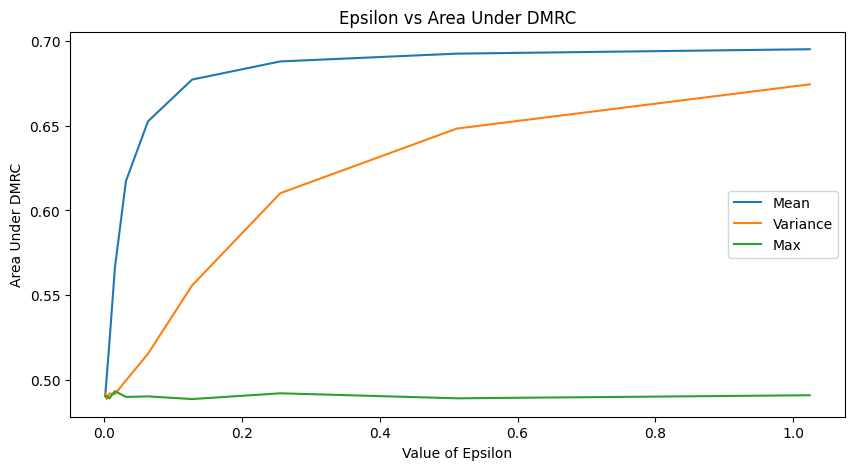

In [144]:

plt.figure(figsize=(10, 5))

# plt.plot(list_r, list_mean_100, label='Statistic Baseline')

# for ratio, eps in zip(list_eps_means_100, list_epsilon):
plt.plot(list_epsilon, areas_mean[1], label='Mean')
plt.plot(list_epsilon, areas_variance[1], label='Variance')
plt.plot(list_epsilon, areas_max[1], label='Max')


plt.xlabel('Value of Epsilon')
plt.ylabel('Area Under DMRC')
plt.title('Epsilon vs Area Under DMRC')
# plt.xlim(0.0, 1.0)
# plt.ylim(0.0, 1.0)
plt.legend()
plt.show()

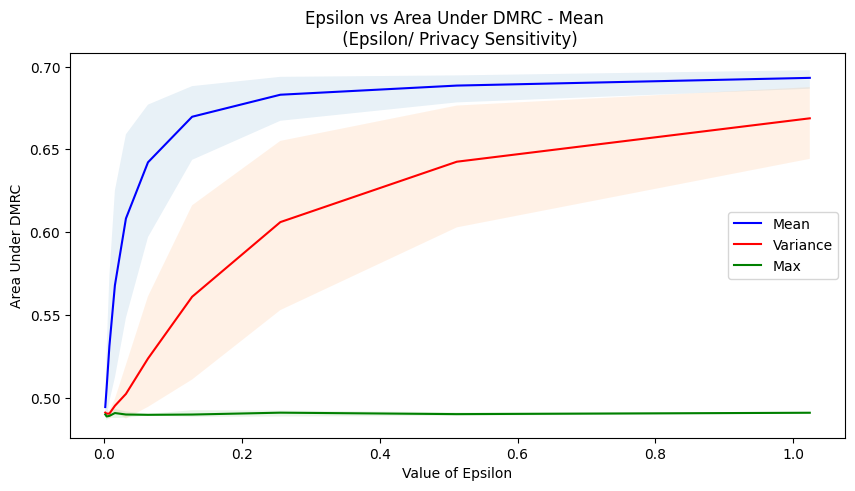

In [145]:
plt.figure(figsize=(10, 5))

# plt.plot(list_r, list_mean_100, label='Statistic Baseline')

# for ratio, eps in zip(list_eps_means_100, list_epsilon):
# plt.plot(list_epsilon, areas_mean[0], label='Mean 50')
# plt.plot(list_epsilon, areas_mean[1], label='Mean 100')
# plt.plot(list_epsilon, areas_mean[2], label='Mean 200')

# Calculate average Epsilon Sensitivity over dataset lengths for Mean
def shaded_line(areas):

    average_line = [sum(values)/len(areas) for values in zip(*areas)]
    highest_line = np.maximum(areas[0], np.maximum(areas[1], areas[2]))
    lowest_line = np.minimum(areas[0], np.minimum(areas[1], areas[2]))

    return average_line, highest_line, lowest_line



average_line, highest_line, lowest_line = shaded_line(areas_mean)
plt.plot(list_epsilon, average_line, color='blue', label='Mean')
plt.fill_between(list_epsilon, highest_line, lowest_line, alpha=0.1)

average_line, highest_line, lowest_line = shaded_line(areas_variance)
plt.plot(list_epsilon, average_line, color='red', label='Variance')
plt.fill_between(list_epsilon, highest_line, lowest_line, alpha=0.1)

# Calculate average Epsilon Sensitivity over dataset lengths for Max
average_line, highest_line, lowest_line = shaded_line(areas_max)
plt.plot(list_epsilon, average_line, color='green', label='Max')
plt.fill_between(list_epsilon, highest_line, lowest_line, alpha=0.1)


plt.xlabel('Value of Epsilon')
plt.ylabel('Area Under DMRC')
plt.title('Epsilon vs Area Under DMRC - Mean \n (Epsilon/ Privacy Sensitivity)')
# plt.xlim(0.0, 1.0)
# plt.ylim(0.0, 1.0)
plt.legend()
plt.show()

In [146]:
from statsmodels.stats.power import TTestIndPower

# Set the parameters for the power analysis
effect_size = 0.2  # Expected effect size
alpha = 0.05      # Significance level
power = 0.8       # Desired power
list_means_power = []


# Perform the power analysis
power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)

# Print the sample size required
print(f"Sample size required: {sample_size:.0f}")

Sample size required: 393


In [147]:
num_samples=100

def hypothesis(data, estimator, safe_estimator):

    means = []
    for ele in data:
        means.append([])
        for item in ele:
            means[-1].append(estimator(item))

    safe_means = []
    for ele in data:
        safe_means.append([])
        for eps in list_epsilon:
            safe_means[-1].append([])
            for item in ele:
                safe_estimator.epsilon=eps
                safe_means[-1][-1].append(safe_estimator(item))

    t= []
    p = []

    for i in range(len(means)):
        p.append([])
        t.append([])
        for eps in safe_means[i]:
            t_statistic, p_value = stats.ttest_ind(eps, means[i])
            p[-1].append(p_value[0])
            t[-1].append(t_statistic[0])

    return p, t

data = []
for length in lengths:
    data.append([])
    for i in range(num_samples):
        data[-1].append(norm.rvs(loc=0.0, scale=1.0, size=length))


p_list = []
p, _ = hypothesis(data, MeanStatistic(), SafeMeanStatistic())
p_list.append(p)
p, _ = hypothesis(data, VarianceStatistic(), SafeVarianceStatistic())
p_list.append(p)
p, _ = hypothesis(data, MaxStatistic(), SafeMaxStatistic())
p_list.append(p)

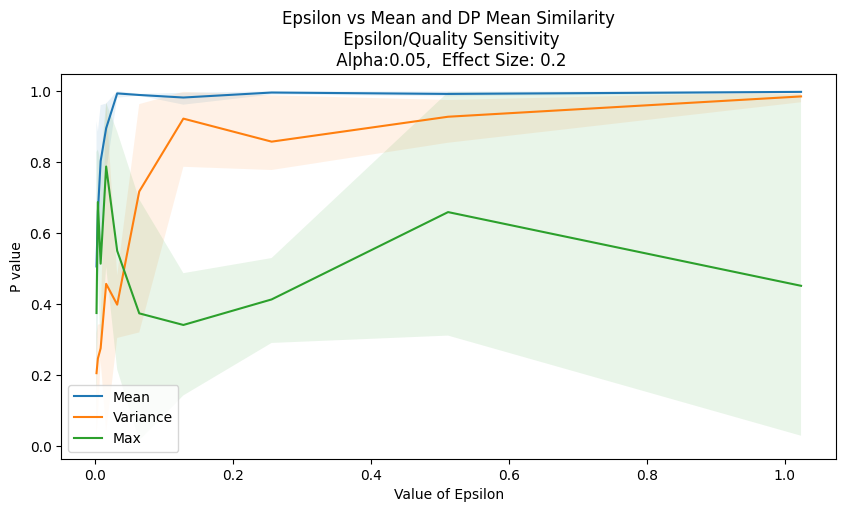

In [148]:
plt.figure(figsize=(10, 5))
methods = ["Mean", "Variance", "Max"]

for p_values, name in zip(p_list, methods):
    average_line, highest_line, lowest_line = shaded_line(p_values)
    plt.plot(list_epsilon, average_line, label=name)
    plt.fill_between(list_epsilon, highest_line, lowest_line, alpha=0.1)

plt.xlabel('Value of Epsilon')
plt.ylabel('P value')
plt.title('Epsilon vs Mean and DP Mean Similarity\n Epsilon/Quality Sensitivity\n Alpha:'+str(alpha)+',  Effect Size: '+str(effect_size))
# plt.xlim(0.0, 1.0)
# plt.ylim(0.0, 1.0)
plt.legend()
plt.show()